In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplot

%matplotlib inline

In [0]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

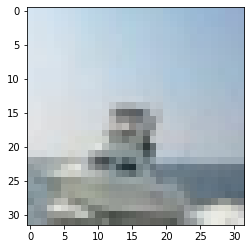

In [6]:
mplot.imshow(X_train[100])

In [0]:
X_test = X_test/255
X_train = X_train/255

In [8]:
X_test.max()

1.0

In [9]:
y_train[0]

array([6], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [12]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [0]:
model = Sequential()
#Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=(32,32,3), activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2), strides=None, padding='valid'))
#Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

#Flattening Layer
model.add(Flatten())

#Fully Connected Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='softmax'))

#compile the network
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               663808    
_________________________________________________________________
dropout (Dropout)            (None, 256)              

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)


In [76]:
model.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test), epochs=20, batch_size=256, validation_batch_size=256)

Epoch 1/20
196/196 [==============================] - 4s 21ms/step - loss: 1.7399 - accuracy: 0.3526 - val_loss: 1.4651 - val_accuracy: 0.4568
Epoch 2/20
196/196 [==============================] - 4s 20ms/step - loss: 1.3658 - accuracy: 0.5065 - val_loss: 1.3004 - val_accuracy: 0.5323
Epoch 3/20
196/196 [==============================] - 4s 20ms/step - loss: 1.2262 - accuracy: 0.5632 - val_loss: 1.2030 - val_accuracy: 0.5835
Epoch 4/20
196/196 [==============================] - 4s 21ms/step - loss: 1.1223 - accuracy: 0.5998 - val_loss: 1.0988 - val_accuracy: 0.6170
Epoch 5/20
196/196 [==============================] - 4s 21ms/step - loss: 1.0451 - accuracy: 0.6294 - val_loss: 1.0133 - val_accuracy: 0.6468
Epoch 6/20
196/196 [==============================] - 4s 20ms/step - loss: 0.9888 - accuracy: 0.6514 - val_loss: 1.0329 - val_accuracy: 0.6449
Epoch 7/20
196/196 [==============================] - 4s 20ms/step - loss: 0.9391 - accuracy: 0.6702 - val_loss: 1.0016 - val_accuracy: 0.6543

In [77]:
history = pd.DataFrame(model.history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,1.739853,0.35258,1.465137,0.4568
1,1.365813,0.50648,1.300444,0.5323
2,1.226246,0.56316,1.202975,0.5835
3,1.122347,0.59978,1.098787,0.6170
4,1.045110,0.62944,1.013304,0.6468
5,0.988750,0.65140,1.032899,0.6449
6,0.939059,0.67022,1.001572,0.6543
7,0.896493,0.68350,0.957318,0.6692
8,0.865667,0.69328,0.969116,0.6651
9,0.811862,0.71458,0.955245,0.6752


In [0]:
loss = history[['loss', 'val_loss']]
accur = history[['accuracy', 'val_accuracy']]

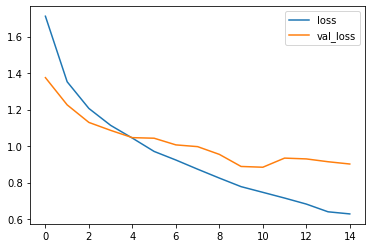

In [32]:
loss.plot()

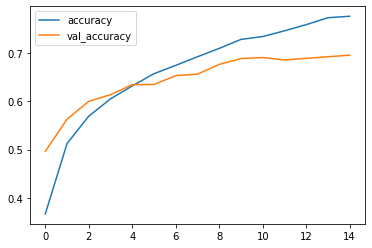

In [33]:
accur.plot()

In [34]:
model.evaluate(X_test, y_cat_test, batch_size=256)

40/40 [==============================] - 0s 9ms/step - loss: 0.9017 - accuracy: 0.6960


[0.9016666412353516, 0.6959999799728394]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1000
           1       0.79      0.82      0.81      1000
           2       0.61      0.57      0.59      1000
           3       0.49      0.50      0.50      1000
           4       0.64      0.65      0.64      1000
           5       0.63      0.54      0.58      1000
           6       0.70      0.82      0.76      1000
           7       0.79      0.74      0.77      1000
           8       0.77      0.82      0.79      1000
           9       0.84      0.70      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



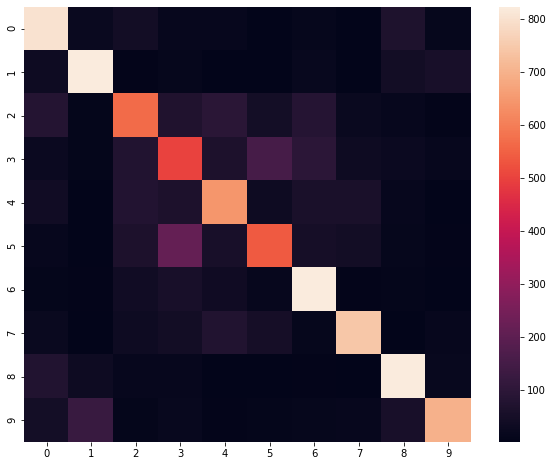

In [67]:
import seaborn as sns
mplot.figure(figsize=(10,8))
mapping_dict = {0:'airplane',
                1:'automobile',
                2:'bird',
                3:'cat',
                4:'deer',
                5:'dog',
                6:'frog',
                7:'horse',
                8:'ship',
                9:'truck',
                }
sns.heatmap(confusion_matrix(y_test, predictions))

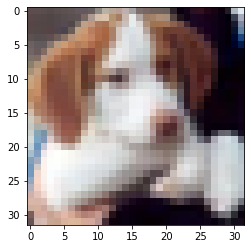

In [70]:
num = np.random.randint(10000)
my_img = X_test[num]
my_img.shape
mplot.imshow(my_img)

In [71]:
my_img = my_img.reshape(1,32,32,3)
print(mapping_dict[model.predict_classes(my_img)[0]])

dog


In [0]:
model2 = Sequential()
model2.add(Conv2D(filters=96, kernel_size=(5,5), padding='same', input_shape=(32,32,3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(3072, activation='relu'))
model2.add(Dropout(rate=0.3))
model2.add(Dense(1536, activation='relu'))
model2.add(Dropout(rate=0.3))
model2.add(Dense(1536, activation='relu'))
model2.add(Dropout(rate=0.3))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
early_stop2 = EarlyStopping(monitor='val_loss', patience=2)

In [85]:
model2.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test), epochs=20, batch_size=256, validation_batch_size=256, callbacks=[early_stop2])

Epoch 1/20
196/196 [==============================] - 21s 108ms/step - loss: 1.7351 - accuracy: 0.3442 - val_loss: 1.4359 - val_accuracy: 0.4828
Epoch 2/20
196/196 [==============================] - 21s 107ms/step - loss: 1.1779 - accuracy: 0.5758 - val_loss: 1.0460 - val_accuracy: 0.6268
Epoch 3/20
196/196 [==============================] - 21s 107ms/step - loss: 0.9381 - accuracy: 0.6708 - val_loss: 0.9450 - val_accuracy: 0.6719
Epoch 4/20
196/196 [==============================] - 21s 107ms/step - loss: 0.7724 - accuracy: 0.7303 - val_loss: 0.8339 - val_accuracy: 0.7045
Epoch 5/20
196/196 [==============================] - 21s 107ms/step - loss: 0.6573 - accuracy: 0.7714 - val_loss: 0.8989 - val_accuracy: 0.7049
Epoch 6/20
196/196 [==============================] - 21s 107ms/step - loss: 0.5575 - accuracy: 0.8071 - val_loss: 0.7419 - val_accuracy: 0.7477
Epoch 7/20
196/196 [==============================] - 21s 107ms/step - loss: 0.4465 - accuracy: 0.8442 - val_loss: 0.8244 - val_ac

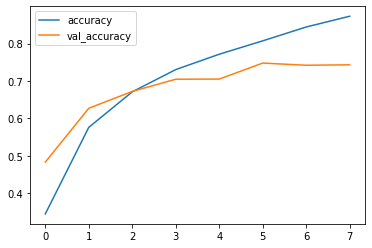

In [88]:
history = pd.DataFrame(model2.history.history)
loss = history[['loss', 'val_loss']]
accur = history[['accuracy', 'val_accuracy']]
accur.plot()

In [89]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 96)        7296      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 256)       221440    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 384)         885120    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 384)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)             

In [0]:
predictions2 = model.predict_classes(X_test)

In [92]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9806 - accuracy: 0.6934


[0.9806085824966431, 0.6934000253677368]

In [99]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.73      0.88      0.80      1000
           2       0.60      0.58      0.59      1000
           3       0.55      0.40      0.46      1000
           4       0.65      0.64      0.65      1000
           5       0.60      0.60      0.60      1000
           6       0.74      0.77      0.76      1000
           7       0.76      0.73      0.74      1000
           8       0.79      0.80      0.79      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



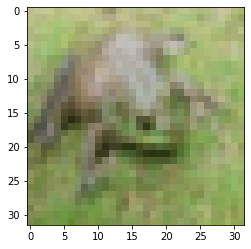

In [100]:
num = np.random.randint(10000)
my_img = X_test[num]
my_img.shape
mplot.imshow(my_img)

In [101]:
my_img = my_img.reshape(1,32,32,3)
print(mapping_dict[model.predict_classes(my_img)[0]])

frog


In [103]:
model.save('cifar10_70')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cifar10_70/assets
